### Housing Dataset

<img src='/work/Housing-/boston housing.jpeg' alt='Boston housing' width="600" height="50">

Con este dataset analizaremos el valor de la vivienda en los suburbios de boston.

### Informacion de los atributos:
+ **CRIM:** tasa de criminalidad per cápita por ciudad.
+ **ZN:** proporción de suelo residencial zonificado para lotes de más de 25000 pies cuadrados.
+ **INDUS:** proporción de acres comerciales no minoristas por ciudad.
+ **CHAS:** variable ficticia del Río Charles (=1 si el tramo limita con el río,=0 en caso contrario).
+ **NOX:** concentración de óxidos nítricos (partes por 10 millones).
+ **RM:** promedio de cuartos por vivienda.
+ **AGE:** proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
+ **DIS:** distancias ponderadas a cinco centros de empleo de Boston.
+ **RAD:** índice de accesibilidad a carreteras.
+ **TAX:** tasa de impuesto a la propiedad de valor total por $ 10,000.
+ **PTRATIO:** proporción de alumnos por maestro por ciudad.
+ **B:** 1000(Bk -0.63)^2 donde Bk es la proporción de gente de color por ciudad.
+ **LSTAT:** % estado más bajo de la población.
+ **MEDV:** valor medio de viviendas ocupadas por sus propietarios en $1,000´s.


### Carga de datos

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/work/Housing-/housing.data', header=None, sep='\s+')
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Gráfico de correlaciones y mapa de calor

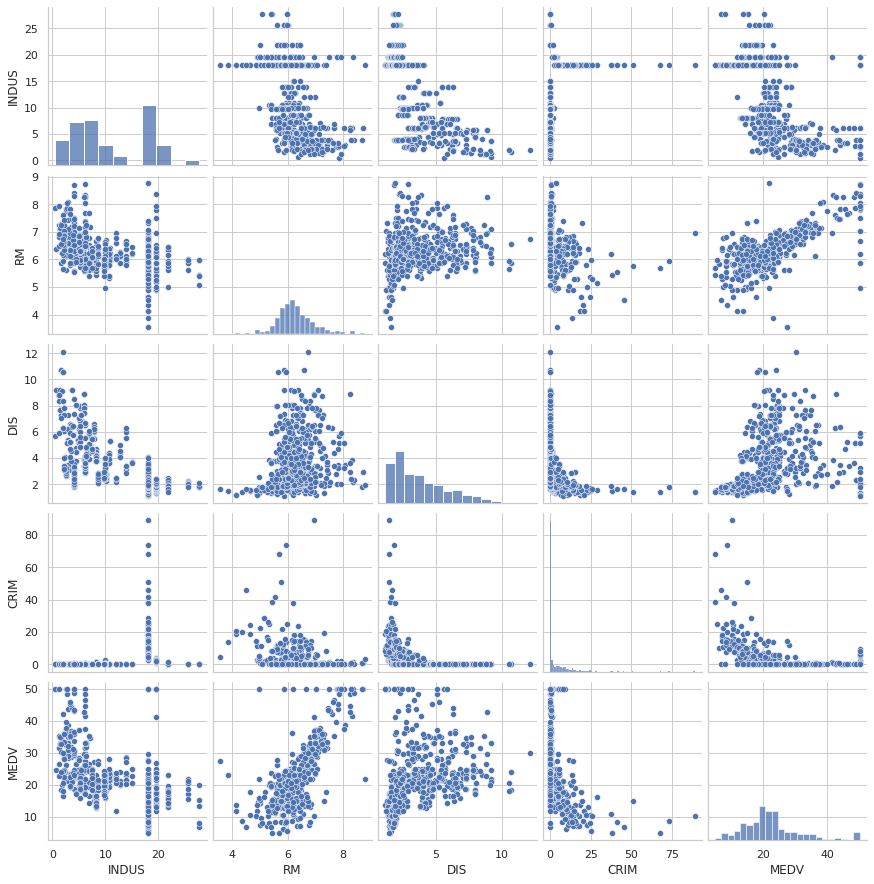

In [ ]:
sns.set(style='whitegrid', context='notebook')
cols = ['INDUS','RM','DIS','CRIM','MEDV']
sns.pairplot(df[cols],height=2.5,kind='scatter')
plt.show()

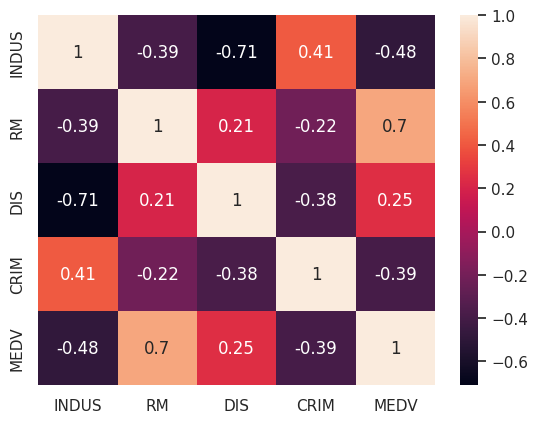

In [ ]:
df_corr = df[cols].corr()
sns.heatmap(df_corr,cbar=True,annot=True)
plt.show()

En este analisis visual, observamos como la relacion que existe entre **RM**(promedio de cuarto por vivienda) y **MEDV** (valor promedio de las viviendas)

### Creando modelo con sklearn con las variables RM y MEDV

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
x = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std,y_std)

LinearRegression()

### Graficamos el modelo

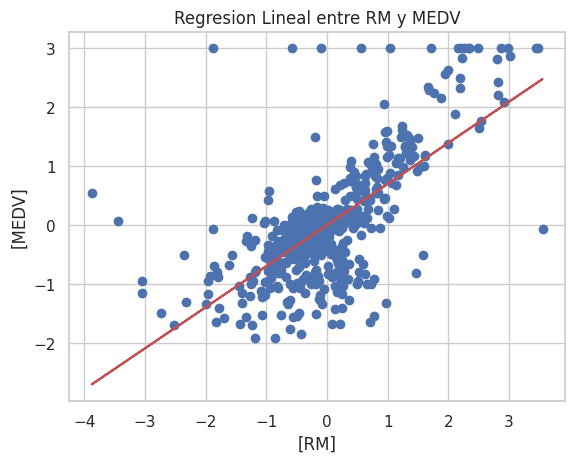

In [ ]:
plt.scatter(x_std,y_std)
plt.plot(x_std,slr.predict(x_std),color='r')
plt.xlabel('[RM]')
plt.ylabel('[MEDV]')
plt.title('Regresion Lineal entre RM y MEDV')
plt.show()

### Generamos predicción con el modelo

In [ ]:
num_hab = 5
num_hab_std = sc_x.transform(np.array([num_hab]).reshape(-1,1))
precio = float(sc_y.inverse_transform(slr.predict(num_hab_std)))
print(f'El precio estimado para una casa de {num_hab} habitaciones en Boston es de US$ {round(precio,2)} mil ')

El precio estimado para una casa de 5 habitaciones en Boston es de US$ 10.84 mil 


### Creando modelo multivariable con sklearn con RM , MEDV y INDUS

In [ ]:
x = df[['RM','INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std,y_std)

LinearRegression()

### Graficamos el modelo multivariable

In [ ]:
from mpl_toolkits.mplot3d import *

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_151/98088776.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection= '3d')


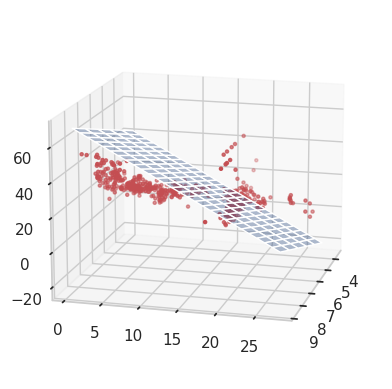

In [ ]:
x1_range = np.arange(df['RM'].min(),df['RM'].max())
x2_range = np.arange(df['INDUS'].min(),df['INDUS'].max())

X1, X2 = np.meshgrid(x1_range,x2_range)
plano = pd.DataFrame({'RM':X1.ravel(),'INDUS':X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig= plt.figure()
ax = fig.gca(projection= '3d')
ax.plot_surface(X1,X2,pred,alpha=0.4)

ax.scatter3D(df['RM'],df['INDUS'],df['MEDV'],color='r',marker='.')
ax.view_init(15,15)
plt.show()

En este gráfico, podemos observar como el plano sirve para predecir una tendencia entre la variable **RM**(promedio de cuartos por vivienda.), **MEDV**(valor medio de viviendas ocupadas por sus propietarios en $1,000´s.) y **INDUS**(proporción de acres comerciales no minoristas por ciudad.)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=95b9d325-3e36-4c42-9fa8-4f9690067486' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>